In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

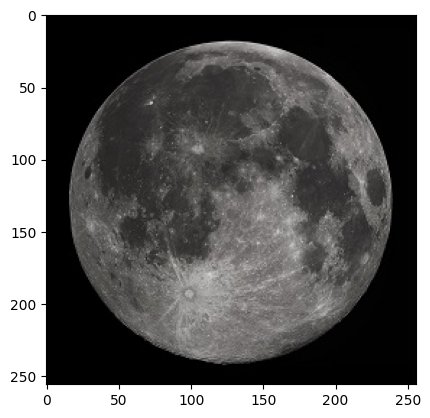

In [2]:
img = cv2.cvtColor(cv2.imread("../data/Moon.png"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [3]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img)
    t = np.copy(out)
    # draw circle
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(t)
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    #t = color.rgb2lab(t)
    #return np.sum(color.deltaE_cie76(t, img))
    return np.average(np.abs(np.subtract(img, t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.3], out, img) #X,Y,r,R,G,B,alpha

54.80108642578125

In [4]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

In [5]:
h, w, c = img.shape

bounds = [
    [0, w],# x
    [0, h], # y
    [5, (w + h)//4], # radius
    [0, 255], # B
    [0, 255], # G
    [0, 255], # R
    [0.3, 1], # alpha
]

nIter, cR, popSize = 300, 0.75, 75

# Our Differential Evolution

In [6]:
from differential_evolution import differential_evolution

0 {'P': array([127.71075553, 130.07904278, 111.62886457, 127.22480429,
       123.80374422, 117.95028707,   0.33155226]), 'nIt': 300, 'fun': 31.865264892578125, 'nFev': 22575}


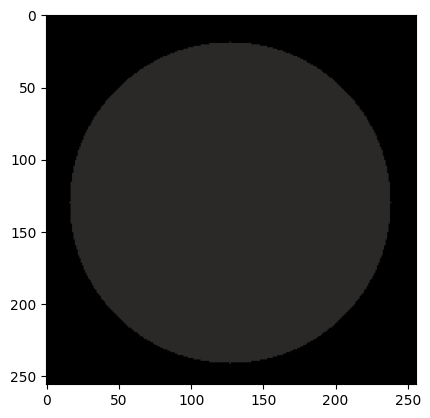

60 {'P': array([256. ,   0. ,   5. ,   0. ,   0. ,   0. ,   0.3]), 'nIt': 300, 'fun': 19.546717325846355, 'nFev': 22575}


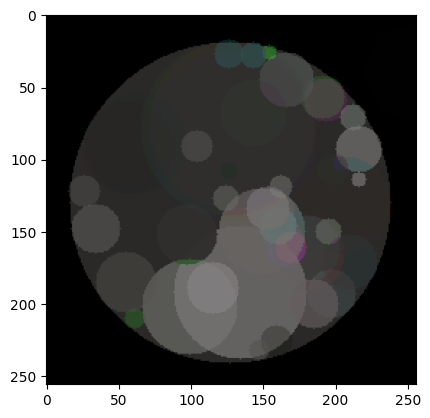

120 {'P': array([225.74869988, 223.25864536,  20.53832821,   0.        ,
         0.        ,   1.10918242,   0.79534418]), 'nIt': 300, 'fun': 18.4664306640625, 'nFev': 22575}


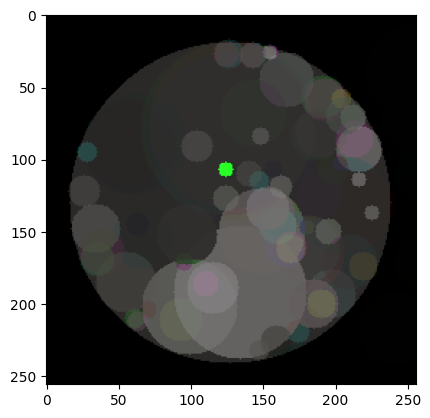

180 {'P': array([208.1423053 ,   5.49788184,   5.        ,   0.        ,
         0.        ,   0.        ,   0.62345955]), 'nIt': 300, 'fun': 17.791554768880207, 'nFev': 22575}


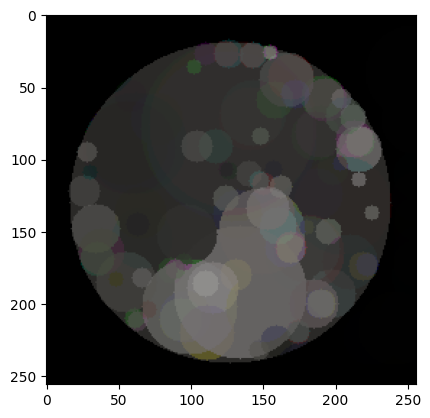

240 {'P': array([256.        , 256.        ,   9.39492082,   0.        ,
         0.        ,   0.        ,   0.3       ]), 'nIt': 300, 'fun': 17.41131083170573, 'nFev': 22575}


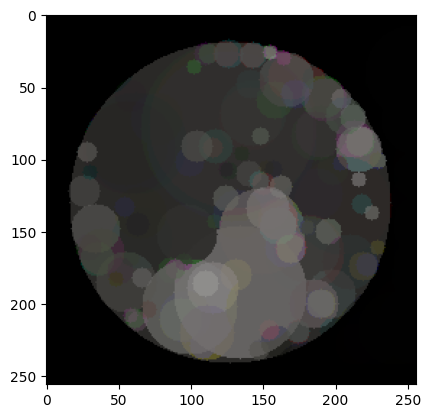

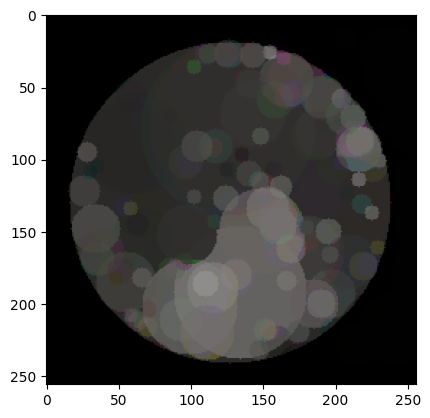

In [7]:
out = np.zeros_like(img)
data = np.zeros((nIter, len(bounds)))
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=popSize, cR = cR, nMax = nIter) #The smaller cR is, it takes less risks
    if True: data[i] = r["P"]
    if i % (nIter // np.min((nIter, 5))): 
        draw_circle(r["P"], out)
    else:
        print(i, r)
        draw_circle(r["P"], out, True)
plt.imshow(out)

# Scipy Differential Evolution

In [8]:
from scipy.optimize import differential_evolution

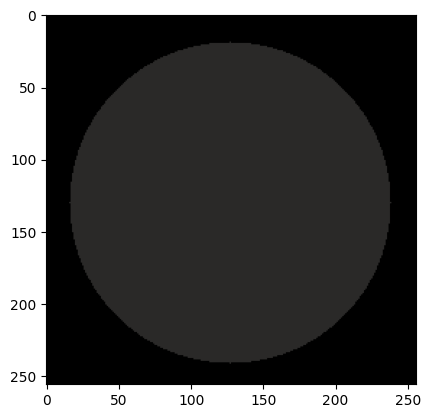

0      fun: 31.876917521158855
 message: 'Optimization terminated successfully.'
    nfev: 21008
     nit: 39
 success: True
       x: array([127.03212426, 130.80532055, 111.96706513, 128.19565262,
       125.56205454, 121.82906309,   0.32744004])


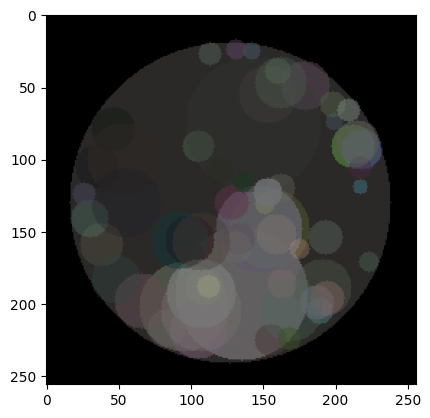

60      fun: 20.814961751302082
 message: 'Optimization terminated successfully.'
    nfev: 5258
     nit: 9
 success: True
       x: array([107.19787981, 157.5782224 ,  20.87723879,  72.58768356,
        59.52365402,  49.96337697,   0.38458974])


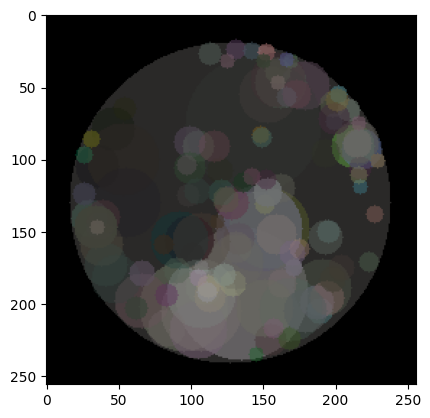

120      fun: 19.442525227864582
 message: 'Optimization terminated successfully.'
    nfev: 5783
     nit: 10
 success: True
       x: array([31.14020951, 86.73856068,  6.07291795, 87.39933078, 87.86563564,
       24.43739491,  0.7005206 ])


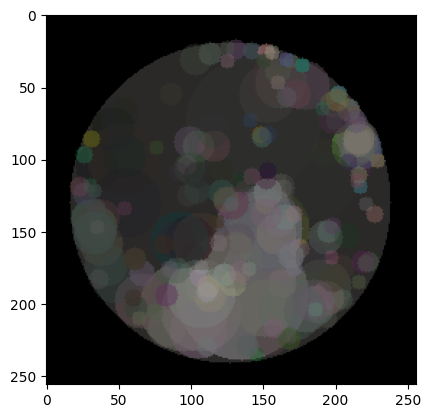

180      fun: 18.665639241536457
 message: 'Optimization terminated successfully.'
    nfev: 5783
     nit: 10
 success: True
       x: array([ 60.59894477, 196.23685533,   6.82757768,  50.59759391,
        30.02050847,  15.81531249,   0.30413341])


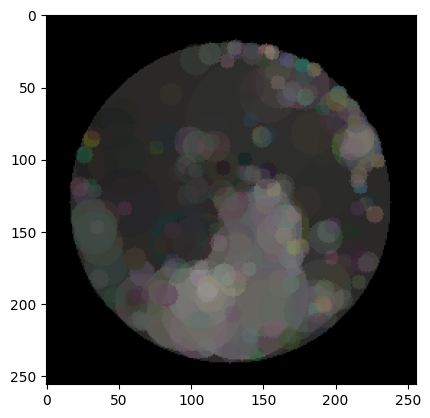

240      fun: 18.163289388020832
 message: 'Optimization terminated successfully.'
    nfev: 5783
     nit: 10
 success: True
       x: array([117.58977956, 149.60795248,   5.17600317,  67.8740961 ,
        85.09839351,  66.02119443,   0.30380948])


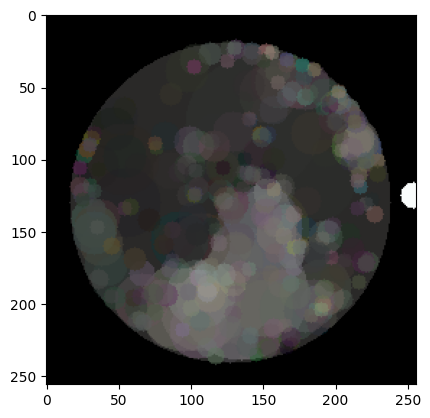

In [9]:
out = np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), recombination = cR, popsize= popSize)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // np.min((nIter, 5))): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.